Data Preprocessing for Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import string
import nltk
from nltk.corpus import stopwords
from typing import List, Optional
import re


Import the data files and examine the data.

In [3]:
# job postings dataset
job_df = pd.read_csv('data/Fake_Real_Job_Posting.csv')
job_df.head(10)

,Unnamed: 0,title,location,requirements,employment_type,industry,function,fraudulent
0,0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real
1,1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real
2,2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real
3,3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,Not Mentioned,Not Mentioned,Not Mentioned,Real
4,4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real
5,5,Insurance Agent,"US, PA, Reading",Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Real
6,6,Chief Commercial Officer,"US, NY,",Requisite Capabilities and Characteristics – F...,Full-time,Food & Beverages,Sales,Real
7,7,UI Designer,"US, TX, Austin","Bachelor’s degree in graphic design, web desig...",Full-time,Computer Software,Product Management,Real
8,8,Fiinovation - Post for Relationship Manager,"IN, DL, New Delhi",Desired Candidate Profile: Articulate in Engli...,Full-time,Nonprofit Organization Management,Other,Real
9,9,Account Management Intern,"GB, ,",A good eye for detail.Proven management skills...,Not Mentioned,Not Mentioned,Not Mentioned,Real


In [4]:
# sms spam dataset
from datasets import load_dataset

ds= load_dataset("ucirvine/sms_spam")
sms_df = ds["train"].to_pandas()
sms_df.head(10)

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


In [5]:
# email spam dataset
email_df = pd.read_csv("data/spam_Emails_data.csv")
email_df.head(10)

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...
5,Spam,img src escapenumberd http loan co kr img emai...
6,Ham,attached is the weekly deal report from 10 / 1...
7,Ham,this is the version that we created earlier th...
8,Ham,pulp writing printing paper escapenumber escap...
9,Ham,stefan metze metzmacher writes stefan metze m...


Drop the 'Unnamed: 0' column as it doesn't bring any value to the job postings dataset and is numerical.

In [6]:
job_df = job_df.drop(columns=['Unnamed: 0'])

job_df.head(10)

,title,location,requirements,employment_type,industry,function,fraudulent
0,Lead UX / UI Designer,"US, NY, Brookyn",4+ years of experience in UX / UI design prefe...,Full-time,Internet,Design,Real
1,Technical Manager,"GB, CAM, Huntingdon",Food Science/Technology Graduate or similar di...,Full-time,Food Production,Quality Assurance,Real
2,Quality Engineer,"US, OH, cincinnati",Job Duties and Responsibilities:AnalysisPerfor...,Full-time,Medical Devices,Engineering,Real
3,"International Broadcaster, Lao Service","US, DC, Washington",The International Broadcaster shall have at le...,Not Mentioned,Not Mentioned,Not Mentioned,Real
4,Distribution Specialist,"NL, NB, Eindhoven",Experience in professional logistic/warehouse ...,Full-time,Internet,Distribution,Real
5,Insurance Agent,"US, PA, Reading",Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Real
6,Chief Commercial Officer,"US, NY,",Requisite Capabilities and Characteristics – F...,Full-time,Food & Beverages,Sales,Real
7,UI Designer,"US, TX, Austin","Bachelor’s degree in graphic design, web desig...",Full-time,Computer Software,Product Management,Real
8,Fiinovation - Post for Relationship Manager,"IN, DL, New Delhi",Desired Candidate Profile: Articulate in Engli...,Full-time,Nonprofit Organization Management,Other,Real
9,Account Management Intern,"GB, ,",A good eye for detail.Proven management skills...,Not Mentioned,Not Mentioned,Not Mentioned,Real


Check for Null values and drop them since only 1 present.

In [7]:
job_df.isna().sum()

title              0
location           0
requirements       1
employment_type    0
industry           0
function           0
fraudulent         0
dtype: int64

In [8]:

job_df = job_df.dropna()
job_df.isna().sum()

title              0
location           0
requirements       0
employment_type    0
industry           0
function           0
fraudulent         0
dtype: int64

In [9]:
sms_df.isna().sum()

sms      0
label    0
dtype: int64

In [10]:
email_df.isna().sum()


label    0
text     2
dtype: int64

In [11]:
email_df = email_df.dropna()
email_df.isna().sum()

label    0
text     0
dtype: int64

Columns "title", "location", "requirements", "employment_type", "industry", "function" all contain text data relevant to the job posting. Therefore, let's merge them into one column of categorical data.

The data in the "fraudulent" column is in the format "Fake" or "Real". Since we're dealing with binary classification, let's convert it to binary format with 1-Fake, 0-Real.

In [12]:
job_df_clean = pd.DataFrame()
job_df_clean["text"] = job_df.drop(columns=['fraudulent']).astype(str).agg(' '.join, axis=1)
job_df_clean["fraudulent"] = job_df['fraudulent']
job_df_clean["fraudulent"] = job_df_clean["fraudulent"].map({"Fake": 1, "Real": 0})
job_df_clean.head(10)

,text,fraudulent
0,"Lead UX / UI Designer US, NY, Brookyn 4+ years...",0
1,"Technical Manager GB, CAM, Huntingdon Food Sci...",0
2,"Quality Engineer US, OH, cincinnati Job Duties...",0
3,"International Broadcaster, Lao Service US, DC...",0
4,"Distribution Specialist NL, NB, Eindhoven Expe...",0
5,"Insurance Agent US, PA, Reading Not Mentioned ...",0
6,"Chief Commercial Officer US, NY, Requisite Ca...",0
7,"UI Designer US, TX, Austin Bachelor’s degree i...",0
8,Fiinovation - Post for Relationship Manager IN...,0
9,"Account Management Intern GB, , A good eye f...",0


In [13]:
email_df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [14]:
email_df['label'] = email_df['label'].map({"Spam": 1, "Ham": 0})
email_df.head(10)

,label,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached is the weekly deal report from 10 / 1...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze m...


In [15]:
job_df_clean['fraudulent'].value_counts()

fraudulent
0    17013
1      866
Name: count, dtype: int64

Create a histogram of the distribution of counts of fraudulent/real job postings. Our data is highly skewed  with 17013 real postings and 866 fake ones.

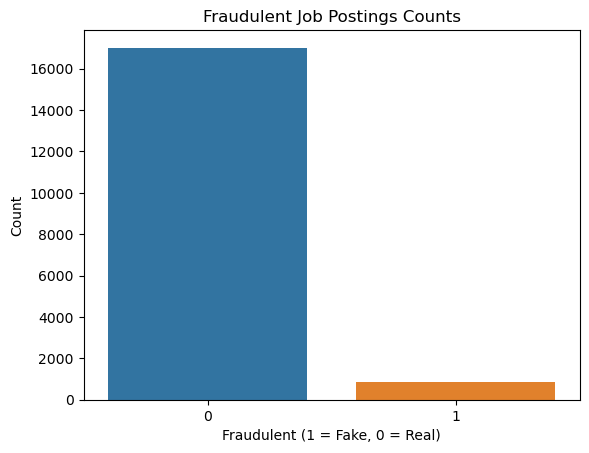

In [16]:
sns.countplot(data=job_df_clean, x="fraudulent")

plt.title("Fraudulent Job Postings Counts")
plt.xlabel("Fraudulent (1 = Fake, 0 = Real)")
plt.ylabel("Count")
plt.show()

In [17]:
sms_df["label"].value_counts()

label
0    4827
1     747
Name: count, dtype: int64

Create a histogram of the distribution of counts of fake/real SMS. Our data is skewed  with 4827 real SMS and 747 spam ones.

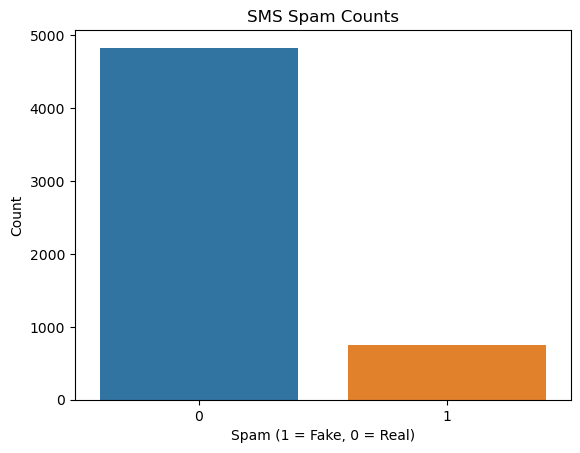

In [18]:
sns.countplot(data=sms_df, x="label")

plt.title("SMS Spam Counts")
plt.xlabel("Spam (1 = Fake, 0 = Real)")
plt.ylabel("Count")
plt.show()

In [19]:
email_df["label"].value_counts()

label
0    102159
1     91691
Name: count, dtype: int64

Create a histogram of the distribution of counts of fake/real emails. Our data is quite balanced with 102159 ham emails and 91691 spam ones.

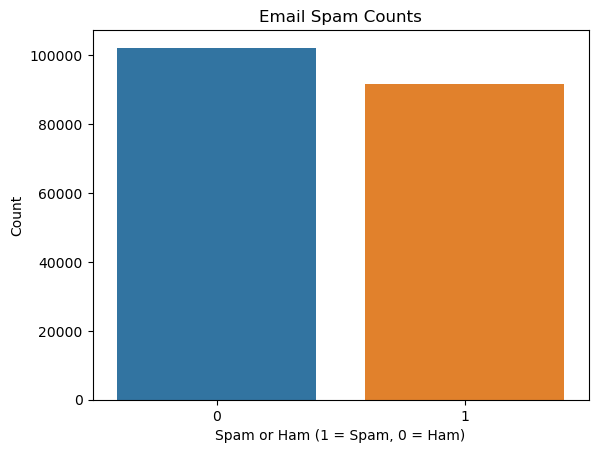

In [20]:
sns.countplot(data=email_df, x="label")

plt.title("Email Spam Counts")
plt.xlabel("Spam or Ham (1 = Spam, 0 = Ham)")
plt.ylabel("Count")
plt.show()

From our research about preprocessing data for fine-tuning BERT models, it's recommended not to remove stop words or punctuation or lemmatize. BERT computes text representations in context and removing stopwords and punctuation and lemmatizing would just mean removing context which BERT could have used to get better results. However, we're still creating two preprocessing functions one with stopwords and punctuation removed, one with stopwords and punctuation kept. In both, we're converting the text to lowercase, removing numerical characters, hyperlinks and extra whitespaces.

In [21]:
# with removing stop words and punctuation
def preprocess_remove_sw_punc(text):
	text = text.lower()  # convert to lowercase
	text = ''.join([char for char in text if not char.isdigit()]) # remove numerical characters
	text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
	text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))

	stop_words = set(stopwords.words('english'))

	text = ' '.join([word for word in text.split() if word not in stop_words]) # remove stop words

	text = " ".join(text.split()) # remove extra spaces


	return text
	

In [22]:
# w/out removing stop words and punctuation
def preprocess(text):
	text = text.lower()  # convert to lowercase
	text = ''.join([char for char in text if not char.isdigit()]) # remove numerical characters
	text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # remove URLs
	text = " ".join(text.split()) # remove extra spaces

	return text


In [23]:
# remove stop words and punctuation
job_df_clean_no_sw = job_df_clean.copy()
job_df_clean_no_sw["text"] = job_df_clean["text"].apply(preprocess_remove_sw_punc)

In [24]:
job_df_clean_no_sw.head(10)

,text,fraudulent
0,lead ux ui designer us ny brookyn years experi...,0
1,technical manager gb cam huntingdon food scien...,0
2,quality engineer us oh cincinnati job duties r...,0
3,international broadcaster lao service us dc wa...,0
4,distribution specialist nl nb eindhoven experi...,0
5,insurance agent us pa reading mentioned mentio...,0
6,chief commercial officer us ny requisite capab...,0
7,ui designer us tx austin bachelor’s degree gra...,0
8,fiinovation post relationship manager dl new d...,0
9,account management intern gb good eye detail p...,0


In [25]:
# don't remove stop words and punctuation, techically better for BERT

job_df_clean_sw = job_df_clean.copy()
job_df_clean_sw["text"] = job_df_clean["text"].apply(preprocess)
job_df_clean_sw.head(10)


,text,fraudulent
0,"lead ux / ui designer us, ny, brookyn + years ...",0
1,"technical manager gb, cam, huntingdon food sci...",0
2,"quality engineer us, oh, cincinnati job duties...",0
3,"international broadcaster, lao service us, dc,...",0
4,"distribution specialist nl, nb, eindhoven expe...",0
5,"insurance agent us, pa, reading not mentioned ...",0
6,"chief commercial officer us, ny, requisite cap...",0
7,"ui designer us, tx, austin bachelor’s degree i...",0
8,fiinovation - post for relationship manager in...,0
9,"account management intern gb, , a good eye for...",0


In [26]:
# remove stop words and punctuation
sms_df_clean_no_sw = sms_df.copy()
sms_df_clean_no_sw["sms"] =sms_df["sms"].apply(preprocess_remove_sw_punc)
sms_df_clean_no_sw.head(10)

,sms,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0
5,freemsg hey darling week word back like fun st...,1
6,even brother like speak treat like aids patent,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile months u r entitled update latest colou...,1


In [27]:
# keeping stop words and punctuation, techically better for BERT
sms_df_clean_sw = sms_df.copy()
sms_df_clean_sw["sms"] =sms_df["sms"].apply(preprocess)
sms_df_clean_sw.head(10)

,sms,label
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in a wkly comp to win fa cup final ...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0
5,freemsg hey there darling it's been week's now...,1
6,even my brother is not like to speak with me. ...,0
7,as per your request 'melle melle (oru minnamin...,0
8,winner!! as a valued network customer you have...,1
9,had your mobile months or more? u r entitled t...,1


In [28]:
# remove stop words and punctuation
email_df_clean_no_sw = email_df.copy()
email_df_clean_no_sw["text"] = email_df["text"].apply(preprocess_remove_sw_punc)
email_df_clean_no_sw.head(10)

,label,text
0,1,viiiiiiagraaaa ones want make scream prodigy s...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom ne eds escapenumber ch n b e th n f ...
3,1,start increasing odds success live sexually he...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached weekly deal report lex carroll enron ...
7,0,version created earlier afternoon using ena sh...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze me...


In [29]:
# keeping stop words and punctuation, techically better for BERT
email_df_clean_sw = email_df.copy()
email_df_clean_sw["text"] =email_df["text"].apply(preprocess)
email_df_clean_sw.head(10)

,label,text
0,1,viiiiiiagraaaa only for the ones that want to ...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...
5,1,img src escapenumberd http loan co kr img emai...
6,0,attached is the weekly deal report from / / - ...
7,0,this is the version that we created earlier th...
8,0,pulp writing printing paper escapenumber escap...
9,0,stefan metze metzmacher writes stefan metze me...


Let's split the data into train, validation, and test sets. Additional testing will be done using job postings scrapped off the Web.

In [30]:
from sklearn.model_selection import train_test_split

X_job = job_df_clean_sw['text'] # features
y_job = job_df_clean_sw['fraudulent'] # labels

# First split: 80% train, 20% temp (validation + test)
X_train_job, X_temp_job, y_train_job, y_temp_job = train_test_split( X_job, y_job, test_size=0.2, random_state=42, stratify=y_job)

# Second split: 10% validation, 10% test 
X_val_job, X_test_job, y_val_job, y_test_job = train_test_split(X_temp_job, y_temp_job, test_size=0.5, random_state=42, stratify=y_temp_job)

print(f"Training set size (job postings): {len(X_train_job)}")
print(f"Validation set size (job postings): {len(X_val_job)}")
print(f"Test set size (job postings): {len(X_test_job)}")

Training set size (job postings): 14303
Validation set size (job postings): 1788
Test set size (job postings): 1788


In [31]:

X_sms = sms_df_clean_sw['sms']  # features
y_sms = sms_df_clean_sw['label']  # labels

X_train_sms, X_temp_sms, y_train_sms, y_temp_sms = train_test_split(X_sms, y_sms, test_size=0.2, random_state=42, stratify=y_sms)

X_val_sms, X_test_sms, y_val_sms, y_test_sms = train_test_split(X_temp_sms, y_temp_sms, test_size=0.5, random_state=42, stratify=y_temp_sms)

print(f"Training set size (SMS): {len(X_train_sms)}")
print(f"Validation set size (SMS): {len(X_val_sms)}")
print(f"Test set size (SMS): {len(X_test_sms)}")

Training set size (SMS): 4459
Validation set size (SMS): 557
Test set size (SMS): 558


In [32]:

X_email = email_df_clean_sw['text']  # features
y_email = email_df_clean_sw['label']  # labels

X_train_email, X_temp_email, y_train_email, y_temp_email = train_test_split(X_email, y_email, test_size=0.2, random_state=42, stratify=y_email)

X_val_email, X_test_email, y_val_email, y_test_email = train_test_split(X_temp_email, y_temp_email, test_size=0.5, random_state=42, stratify=y_temp_email)

print(f"Training set size (Email): {len(X_train_email)}")
print(f"Validation set size (Email): {len(X_val_email)}")
print(f"Test set size (Email): {len(X_test_email)}")

Training set size (Email): 155080
Validation set size (Email): 19385
Test set size (Email): 19385


Since our data in job postings and sms spam datasets is skewed, we've considered undersampling or oversampling. However, after undersampling we have too little data, and oversampling has a high risk of overfitting, so we decided to keep it as it is in the dataset.

In [33]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

In [34]:
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train.values.reshape(-1, 1), y_train)
# print(f"Original dataset shape: {Counter(y_train)}")
# print(f"Resampled dataset shape: {Counter(y_resampled)}")

Now, let's tokenize our train and validation data using BERT's toeknizers.

In [35]:
from transformers import BertModel, BertTokenizer
import torch

2025-04-29 15:36:41.355510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [37]:
model = BertModel.from_pretrained('bert-base-uncased')

`tokenize_data` function takes an input df/series, converts it to a list, tokenizer (in our case BERT's tokenizer) and max sequence length. Applies truncation and padding to ensure uniform sequence lengths and returns tokenized data as PyTorch sensors.

In [38]:
def tokenize_data(text, tokenizer, max_length=256):
	return tokenizer(
		text.tolist(),
		add_special_tokens=True,
		padding=True,
		truncation=True,
		max_length=max_length,
		return_tensors='pt'
	)

In [39]:
train_encodings_job = tokenize_data(X_train_job, tokenizer)

In [40]:
print(train_encodings_job)

{'input_ids': tensor([[  101,  8013,  2326,  ...,     0,     0,     0],
        [  101,  2902,  2923,  ...,     0,     0,     0],
        [  101,  8013,  2490,  ...,     0,     0,     0],
        ...,
        [  101, 16380,  3026,  ..., 20116,  2015,   102],
        [  101,  2503,  4341,  ...,     0,     0,     0],
        [  101, 13866,  3454,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


input_ids = token ids for each word, attention_mask = padding (0) or actual text (1)

In [41]:
val_encodings_job = tokenize_data(X_val_job, tokenizer)

In [42]:
print(val_encodings_job)

{'input_ids': tensor([[  101,  4007,  1053,  ...,  1012,  9059,   102],
        [  101,  4031,  7601,  ...,     0,     0,     0],
        [  101,  3026,  4007,  ...,     0,     0,     0],
        ...,
        [  101,  7233,  8325,  ...,     0,     0,     0],
        [  101,  7861,  3215,  ...,  2740,  2729,   102],
        [  101,  3361, 11486,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [43]:
print(f"Train input IDs shape: {train_encodings_job['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_job['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_job['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_job['attention_mask'].shape}")

Train input IDs shape: torch.Size([14303, 256])
Train attention masks shape: torch.Size([14303, 256])
Validation input IDs shape: torch.Size([1788, 256])
Validation attention masks shape: torch.Size([1788, 256])


In [44]:
train_encodings_sms = tokenize_data(X_train_sms, tokenizer)
val_encodings_sms = tokenize_data(X_val_sms, tokenizer)
print(f"Train input IDs shape: {train_encodings_sms['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_sms['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_sms['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_sms['attention_mask'].shape}")

Train input IDs shape: torch.Size([4459, 234])
Train attention masks shape: torch.Size([4459, 234])
Validation input IDs shape: torch.Size([557, 125])
Validation attention masks shape: torch.Size([557, 125])


In [ ]:
train_encodings_email = tokenize_data(X_train_email, tokenizer)
val_encodings_email = tokenize_data(X_val_email, tokenizer)
print(f"Train input IDs shape: {train_encodings_email['input_ids'].shape}")
print(f"Train attention masks shape: {train_encodings_email['attention_mask'].shape}")
print(f"Validation input IDs shape: {val_encodings_email['input_ids'].shape}")
print(f"Validation attention masks shape: {val_encodings_email['attention_mask'].shape}")